# Latar Belakang
Transportasi merupakan elemen vital dalam kehidupan masyarakat perkotaan, terutama di kota metropolitan seperti New York City (NYC). Salah satu moda transportasi utama di NYC adalah layanan taksi yang digunakan oleh jutaan penduduk dan wisatawan setiap bulannya. Dataset NYC Taxi Trip Pickup Information (TPI) memberikan informasi detail mengenai aktivitas perjalanan taksi, seperti waktu penjemputan, lokasi, durasi, dan tarif perjalanan.

Meskipun data ini terlihat sederhana, data perjalanan taksi menyimpan berbagai informasi tersembunyi yang dapat menggambarkan pola mobilitas masyarakat, tren penggunaan transportasi, hingga anomali dalam sistem transportasi. Dalam konteks ini, analisis terhadap data taksi selama satu bulan saja dapat memberikan gambaran yang signifikan mengenai dinamika perkotaan dan membuka peluang untuk pengambilan keputusan berbasis data, baik untuk keperluan pemerintah, sektor swasta, maupun penelitian akademik.

Sebagai seorang data scientist, tugas utama adalah menggali insight tersembunyi dari data yang tersedia. Melalui analisis eksploratif dan pemodelan, kita dapat mengidentifikasi pola-pola penting, prediksi tren masa depan, serta memberikan rekomendasi berbasis data yang bernilai.



# Rumusan Masalah Analisis Data Taksi NYC

## 1. Bagaimana karakteristik umum dari aktivitas taksi di NYC selama satu bulan tersebut?

- Distribusi jumlah perjalanan per hari
- Rata-rata durasi dan jarak perjalanan
- Jenis pembayaran yang paling sering digunakan
- Distribusi jumlah penumpang per perjalanan

## 2. Kapan waktu sibuk (jam, hari)?

- Pola jumlah perjalanan berdasarkan jam dalam sehari
- Perbandingan jumlah perjalanan antara hari kerja dan akhir pekan
- Waktu dengan frekuensi penjemputan dan pengantaran tertinggi

## 3. Di mana lokasi penjemputan dan tujuan terbanyak?

- Peta sebaran titik penjemputan dan pengantaran
- Lokasi dengan volume perjalanan tertinggi
- Analisis hotspot berdasarkan zona atau koordinat

## 4. Apa saja insight tersembunyi yang dapat dimanfaatkan oleh pemangku kepentingan?

- Rekomendasi peningkatan layanan transportasi (misalnya penambahan armada pada jam sibuk)
- Dukungan untuk perencanaan kota (penyesuaian infrastruktur berdasarkan pola mobilitas)
- Ide untuk pengembangan aplikasi berbasis lokasi (misalnya prediksi waktu tunggu atau permintaan taksi)

# Data
Untuk menjawab pertanyaan di atas, kita akan menganalisa data peserta yang sudah dikumpulkan oleh perusahaan. Dataset dapat diakses [di sini](https://drive.google.com/drive/folders/1NYHIL-RgVPW-HONz4pdzlcbIChF-c37N). 

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

Dataset ini berisi informasi terkait vendor dan waktu perjalanan, lokasi perjalanan, karakteristik penumpang, karakteristik perjalanan, biaya perjalanan, informasi pembayaran, dan informasi teknis. Ada 20 kolom di dalam dataset New York City TLC Trip, yaitu: 
 

| **Field Name**               | **Description**                                                                                       |
|------------------------------|-------------------------------------------------------------------------------------------------------|
| **VendorID**                  | A code indicating the LPEP provider that provided the record. <br> `1 = Creative Mobile Technologies, LLC` <br> `2 = VeriFone Inc.` |
| **lpep_pickup_datetime**      | The date and time when the meter was engaged.                                                         |
| **lpep_dropoff_datetime**     | The date and time when the meter was disengaged.                                                      |
| **Passenger_count**           | The number of passengers in the vehicle. This is a driver-entered value.                              |
| **Trip_distance**             | The elapsed trip distance in miles as reported by the taximeter.                                      |
| **PULocationID**              | TLC Taxi Zone in which the taximeter was engaged (pickup location).                                   |
| **DOLocationID**              | TLC Taxi Zone in which the taximeter was disengaged (dropoff location).                               |
| **RateCodeID**                | The final rate code in effect at the end of the trip. <br> `1 = Standard rate` <br> `2 = JFK` <br> `3 = Newark` <br> `4 = Nassau or Westchester` <br> `5 = Negotiated fare` <br> `6 = Group ride` |
| **Store_and_fwd_flag**        | Indicates whether the trip record was held in vehicle memory before sending to the vendor. <br> `Y = Store and forward trip` <br> `N = Not a store and forward trip` |
| **Payment_type**              | A numeric code signifying how the passenger paid for the trip. <br> `1 = Credit card` <br> `2 = Cash` <br> `3 = No charge` <br> `4 = Dispute` <br> `5 = Unknown` <br> `6 = Voided trip` |
| **Fare_amount**               | The time-and-distance fare calculated by the meter. This includes extra miscellaneous extras and surcharges. |
| **MTA_tax**                   | $0.50 MTA tax that is automatically triggered based on the metered rate in use.                       |
| **Improvement_surcharge**     | $0.30 improvement surcharge assessed on hailed trips at the flag drop. The surcharge began in 2015.   |
| **Tip_amount**                | Credit card tips (automatically populated). Cash tips are not included.                               |
| **Tolls_amount**              | The total amount of all tolls paid in the trip.                                                       |
| **Total_amount**              | The total amount charged to passengers. Does not include cash tips.                                   |
| **Trip_type**                 | A code indicating whether the trip was a street-hail or a dispatch. <br> `1 = Street-hail` <br> `2 = Dispatch` |

Jika di bahasa Indonesia kan akan seperti dibawah ini: 

| **Nama Kolom**                | **Deskripsi**                                                                                         |
|-------------------------------|-------------------------------------------------------------------------------------------------------|
| **VendorID**                  | Kode yang menunjukkan penyedia LPEP yang menyediakan data ini. <br> `1 = Creative Mobile Technologies, LLC` <br> `2 = VeriFone Inc.` |
| **lpep_pickup_datetime**      | Tanggal dan waktu ketika argo mulai diaktifkan.                                                        |
| **lpep_dropoff_datetime**     | Tanggal dan waktu ketika argo dinonaktifkan.                                                           |
| **Passenger_count**           | Jumlah penumpang dalam kendaraan. Ini adalah nilai yang dimasukkan oleh pengemudi.                     |
| **Trip_distance**             | Jarak perjalanan yang dilaporkan oleh argo dalam mil.                                                  |
| **PULocationID**              | Zona taksi TLC di mana argo diaktifkan (lokasi penjemputan).                                           |
| **DOLocationID**              | Zona taksi TLC di mana argo dinonaktifkan (lokasi pengantaran).                                        |
| **RateCodeID**                | Kode tarif yang berlaku pada akhir perjalanan. <br> `1 = Tarif Standar` <br> `2 = JFK` <br> `3 = Newark` <br> `4 = Nassau atau Westchester` <br> `5 = Tarif Negosiasi` <br> `6 = Perjalanan Kelompok` |
| **Store_and_fwd_flag**        | Menunjukkan apakah catatan perjalanan disimpan di memori kendaraan sebelum dikirim ke penyedia. <br> `Y = Perjalanan simpan dan teruskan` <br> `N = Bukan perjalanan simpan dan teruskan` |
| **Payment_type**              | Kode numerik yang menunjukkan bagaimana penumpang membayar perjalanan. <br> `1 = Kartu kredit` <br> `2 = Tunai` <br> `3 = Tanpa biaya` <br> `4 = Sengketa` <br> `5 = Tidak diketahui` <br> `6 = Perjalanan dibatalkan` |
| **Fare_amount**               | Tarif perjalanan berdasarkan waktu dan jarak yang dihitung oleh argo, termasuk biaya tambahan dan surcharge. |
| **MTA_tax**                   | Pajak MTA sebesar $0,50 yang secara otomatis dipicu berdasarkan tarif argo yang digunakan.             |
| **Improvement_surcharge**     | Surcharge peningkatan sebesar $0,30 yang dikenakan pada perjalanan yang dimulai sejak 2015.            |
| **Tip_amount**                | Tips kartu kredit yang diisi secara otomatis. Tips tunai tidak termasuk.                              |
| **Tolls_amount**              | Jumlah total dari semua tol yang dibayar dalam perjalanan.                                             |
| **Total_amount**              | Jumlah total yang dibebankan kepada penumpang, tidak termasuk tips tunai.                             |
| **Trip_type**                 | Kode yang menunjukkan apakah perjalanan adalah street-hail atau dispatch. <br> `1 = Street-hail` <br> `2 = Dispatch` |


In [33]:
df = pd.read_csv('nyc_tlc_trip_record.csv')
display(df.head(), df.tail())

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN
68210,2,2023-01-31 23:51:00,2023-02-01 00:07:00,NaN,NaN,256,140,NaN,5.82,23.65,0.0,0.0,2.00,0.0,NaN,1.0,29.40,NaN,NaN,NaN


## Data Understanding and Cleaning
Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

Pertama, mari kita lihat informasi nama kolom, nilai dan tipe data dari dari dataset.

In [34]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (68211, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14

Langkah berikutnya adalah melakukan identifikasi terhadap nilai-nilai unik yang terdapat di masing-masing kolom.

In [35]:
pd.set_option('display.max_colwidth', None)
# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,VendorID,2,"[2, 1]"
1,lpep_pickup_datetime,66575,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 2023-01-01 00:35:12, 2023-01-01 00:13:14, 2023-01-01 00:33:04, 2023-01-01 00:53:31, 2023-01-01 00:09:14, 2023-01-01 00:11:58, 2023-01-01 00:41:29, 2023-01-01 00:50:32, 2023-01-01 00:16:12, 2023-01-01 00:08:43, 2023-01-01 00:26:32, 2023-01-01 00:18:35, 2023-01-01 00:39:32, 2023-01-01 00:49:34, 2023-01-01 00:10:45, 2023-01-01 00:35:11, 2023-01-01 00:31:06, 2023-01-01 00:14:37, 2023-01-01 00:26:21, 2023-01-01 00:41:56, 2023-01-01 00:32:02, 2023-01-01 00:55:13, 2023-01-01 00:01:31, 2023-01-01 00:22:31, 2023-01-01 00:57:28, 2023-01-01 00:35:21, 2023-01-01 00:52:52, 2023-01-01 00:32:56, 2023-01-01 00:24:01, 2023-01-01 00:46:48, 2023-01-01 00:40:58, 2023-01-01 00:20:23, 2023-01-01 01:49:24, 2023-01-01 00:41:53, 2023-01-01 00:56:26, 2023-01-01 00:33:10, 2023-01-01 00:58:28, 2023-01-01 00:42:49, 2023-01-01 00:48:21, 2023-01-01 00:08:05, 2023-01-01 00:13:47, 2023-01-01 00:16:10, 2023-01-01 00:04:25, 2023-01-01 00:33:38, 2023-01-01 00:46:08, 2023-01-01 01:00:08, 2023-01-01 00:28:04, 2023-01-01 00:23:04, 2023-01-01 00:34:07, 2023-01-01 00:52:03, 2023-01-01 00:25:31, 2023-01-01 00:53:09, 2023-01-01 00:42:37, 2023-01-01 00:39:52, 2023-01-01 00:15:32, 2023-01-01 00:06:48, 2023-01-01 00:57:15, 2023-01-01 00:14:13, 2023-01-01 00:52:48, 2023-01-01 00:34:13, 2023-01-01 00:44:41, 2023-01-01 00:11:12, 2023-01-01 01:44:43, 2023-01-01 01:04:44, 2023-01-01 01:48:11, 2023-01-01 01:11:39, 2023-01-01 01:54:25, 2023-01-01 01:59:10, 2023-01-01 01:22:35, 2023-01-01 01:37:10, 2023-01-01 01:46:22, 2023-01-01 01:59:48, 2023-01-01 01:09:49, 2023-01-01 01:23:35, 2023-01-01 01:53:20, 2023-01-01 01:32:14, 2023-01-01 01:01:05, 2023-01-01 01:34:41, 2023-01-01 01:52:08, 2023-01-01 01:49:28, 2023-01-01 01:03:59, 2023-01-01 01:13:11, 2023-01-01 01:40:06, 2023-01-01 01:33:50, 2023-01-01 01:45:19, 2023-01-01 01:51:29, 2023-01-01 01:34:07, 2023-01-01 01:10:08, 2023-01-01 01:32:17, 2023-01-01 01:48:28, 2023-01-01 01:30:43, 2023-01-01 01:51:10, 2023-01-01 01:09:36, 2023-01-01 01:19:54, 2023-01-01 01:31:10, 2023-01-01 01:42:30, 2023-01-01 00:57:51, 2023-01-01 01:27:36, ...]"
2,lpep_dropoff_datetime,66519,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 2023-01-01 00:41:32, 2023-01-01 00:19:03, 2023-01-01 00:39:02, 2023-01-01 01:11:04, 2023-01-01 00:26:39, 2023-01-01 00:24:55, 2023-01-01 00:46:26, 2023-01-01 01:13:42, 2023-01-01 00:41:43, 2023-01-01 00:17:08, 2023-01-01 00:45:31, 2023-01-01 00:30:09, 2023-01-01 01:18:06, 2023-01-01 01:08:23, 2023-01-01 00:19:37, 2023-01-01 01:17:35, 2023-01-01 00:42:23, 2023-01-01 00:21:50, 2023-01-01 00:30:26, 2023-01-01 00:46:06, 2023-01-01 00:41:25, 2023-01-01 00:59:47, 2023-01-01 00:16:02, 2023-01-01 00:39:24, 2023-01-01 01:09:31, 2023-01-01 00:53:49, 2023-01-01 01:00:53, 2023-01-01 00:42:53, 2023-01-01 00:32:05, 2023-01-01 01:08:17, 2023-01-01 01:04:32, 2023-01-01 00:24:32, 2023-01-01 01:57:51, 2023-01-01 00:41:58, 2023-01-01 01:14:41, 2023-01-01 00:43:08, 2023-01-01 01:14:46, 2023-01-01 00:51:53, 2023-01-01 01:23:50, 2023-01-01 00:13:26, 2023-01-01 00:25:57, 2023-01-01 00:54:55, 2023-01-01 00:17:50, 2023-01-01 00:38:51, 2023-01-01 00:59:10, 2023-01-01 01:05:46, 2023-01-01 00:43:45, 2023-01-01 23:18:32, 2023-01-01 00:50:01, 2023-01-01 00:57:56, 2023-01-01 00:38:40, 2023-01-01 01:13:35, 2023-01-01 00:47:15, 2023-01-01 00:48:54, 2023-01-01 00:23:03, 2023-01-01 01:08:47, 2023-01-01 01:00:15, 2023-01-01 00:25:43, 2023-01-01 01:21:19, 2023-01-01 00:43:57, 2023-01-01 00:48:26, 2023-01-01 00:38:12, 2023-01-01 01:57:31, 2023-01-01 01:11:23, 2023-01-01 02:05:51, 2023-01-01 01:41:21, 2023-01-01 02:05:19, 2023-01-01 02:11:36, 2023-01-01 01:25:11, 2023-01-01 01:41:30, 2023-01-01 02:04:14, 2023-01-01 02:05:29, 2023-01-01 01:17:55, 2023-01-01 01:53:43, 2023-01-01 02:27:01, 2023-01-01 01:43:55, 2023-01-01 01:13:02, 2023-01-01 02:00:06, 2023-01-01 02:00:57, 2023-01-01 02:13:18, 2023-01-01 01:07:17, 2023-01-01 01:26:01, 2

In [36]:
tabel1Desc.to_csv('data_unique_value.txt', sep='|', index=False)

## Kesimpulan Umum

Secara umum, kita bisa melihat bahwa:

* Dataset memiliki **19 kolom** dan **66.575 baris**.
* Beberapa kolom memiliki nilai kosong (`NaN`), yaitu: 
  - `store_and_fwd_flag`
  - `RatecodeID`
  - `passenger_count`
  - `ehail_fee`
  - `payment_type`
  - `trip_type`
  - `congestion_surcharge`

* Kolom `ehail_fee` seluruh nilainya `NaN`, sehingga tidak berguna untuk analisis dan bisa dihapus.
* Kolom `VendorID` hanya memiliki 2 nilai unik, kemungkinan merepresentasikan dua perusahaan taksi.
* Kolom waktu seperti `lpep_pickup_datetime` dan `lpep_dropoff_datetime` memiliki nilai unik yang sangat banyak, merepresentasikan waktu perjalanan. Bisa dikembangkan menjadi fitur baru seperti `pickup_hour`, `pickup_day`, dsb.
* Kolom `store_and_fwd_flag` berisi nilai 'Y' dan 'N'. Nilai `NaN` di sini bisa dipertimbangkan sebagai 'N' (tidak diforward).
* Kolom `RatecodeID`, `payment_type`, dan `trip_type` adalah **data kategorik numerik** dan mengandung `NaN`, bisa dilakukan imputasi atau dikelompokkan sebagai kategori 'unknown'.
* Kolom `PULocationID` dan `DOLocationID` masing-masing memiliki 226 dan 249 nilai unik. Ini merupakan ID lokasi penjemputan dan pengantaran.
* Kolom `passenger_count` memiliki nilai dari 0 hingga 9. Nilai 0 kemungkinan error input dan perlu ditelusuri.
* Kolom `trip_distance`, `fare_amount`, `tip_amount`, `total_amount`, dsb adalah **kolom numerik kontinu** yang bisa digunakan untuk analisis distribusi dan korelasi.
* Terdapat beberapa **nilai yang tidak wajar atau negatif** seperti pada kolom `extra`, `mta_tax`, `improvement_surcharge`, dan `congestion_surcharge`. Perlu dibersihkan lebih lanjut.
* Kolom `total_amount` merupakan variabel target potensial jika ingin melakukan prediksi biaya perjalanan.

### Missing Value

In [37]:
# persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

VendorID                   0.000000
lpep_pickup_datetime       0.000000
lpep_dropoff_datetime      0.000000
store_and_fwd_flag         6.339154
RatecodeID                 6.339154
PULocationID               0.000000
DOLocationID               0.000000
passenger_count            6.339154
trip_distance              0.000000
fare_amount                0.000000
extra                      0.000000
mta_tax                    0.000000
tip_amount                 0.000000
tolls_amount               0.000000
ehail_fee                100.000000
improvement_surcharge      0.000000
total_amount               0.000000
payment_type               6.339154
trip_type                  6.353814
congestion_surcharge       6.339154
dtype: float64

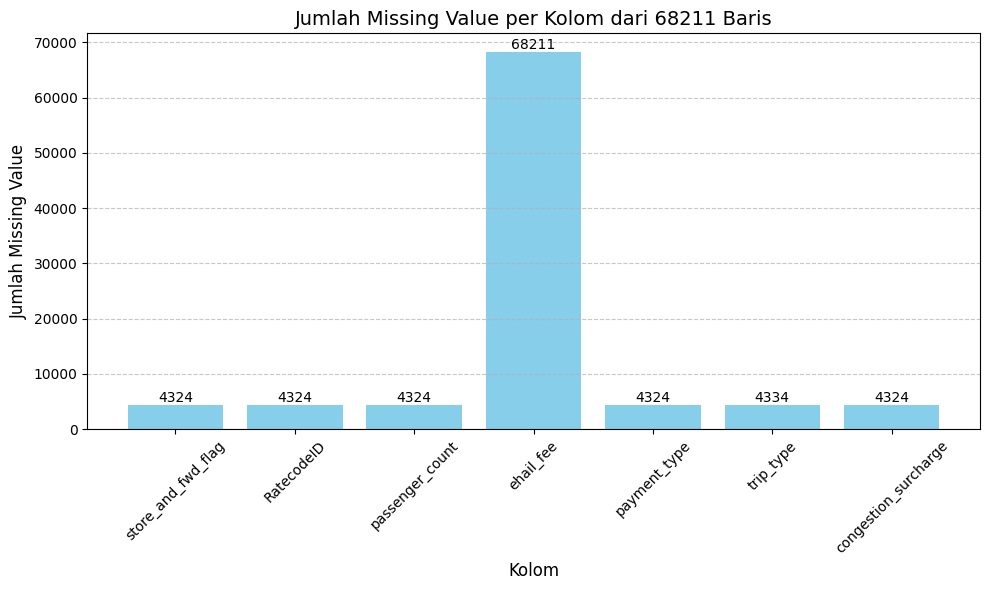

In [38]:
# Sebaran missing value di dalam data
kolom_na = [
    'store_and_fwd_flag',
    'RatecodeID',
    'passenger_count',
    'ehail_fee',
    'payment_type',
    'trip_type',
    'congestion_surcharge'
]

# Hitung jumlah missing value untuk setiap kolom yang dipilih
missing_counts = df[kolom_na].isna().sum()
total_rows = df.shape[0]

# Buat bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(missing_counts.index, missing_counts.values, color='skyblue')

# Tambahkan label angka di atas setiap batang
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, 
        height + 50,  # Atur jarak label dari batang
        f'{int(height)}', 
        ha='center', 
        va='bottom', 
        fontsize=10
    )

# Atur tampilan plot
plt.title(f"Jumlah Missing Value per Kolom dari {total_rows} Baris", fontsize=14)
plt.xlabel("Kolom", fontsize=12)
plt.ylabel("Jumlah Missing Value", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Penanganan Missing Value

Secara garis besar, *missing value* pada kolom `ehail_fee`, `trip_type`, `congestion_surcharge`, `payment_type`, `RatecodeID`, dan `passenger_count` memiliki proporsi yang cukup bervariasi, dengan kolom `ehail_fee` merupakan yang paling banyak kosong, mencapai hampir 100% dari data.

Untuk menangani *missing value*:

1. **Menghapus kolom yang memiliki *missing value* hampir seluruhnya**, yaitu pada kolom `ehail_fee`, karena kolom tersebut tidak memberikan informasi yang berarti.

2. **Menghapus baris yang memiliki *missing value* pada kolom lainnya**, karena proporsinya tidak melebihi 10% dari total data. Mengingat total data yang tersedia cukup besar, yaitu lebih dari 60.000 baris, maka penghapusan baris ini dianggap tidak berdampak signifikan terhadap kualitas data.


In [39]:
# 1. Menghapus kolom 'ehail_fee' karena hampir seluruh datanya kosong
df.drop(columns=["ehail_fee"], inplace=True)

In [40]:
# 2. Menghapus baris yang memiliki missing value di kolom lain
# karena total missing value < 10% dan data cukup besar (> 60.000)
df.dropna(inplace=True)

### Penjelasan Fungsi Kolom dan Alasan Penghapusan Baris dengan Missing Value

Untuk menangani *missing value* pada dataset, perlu dipahami terlebih dahulu fungsi dari masing-masing kolom yang memiliki nilai kosong, serta alasan mengapa baris-baris dengan nilai kosong tersebut lebih baik dihapus daripada diisi secara otomatis (imputasi):

---

#### 1. `trip_type`
- **Fungsi:** Menunjukkan jenis perjalanan (misalnya: reguler, disewa).
- **Alasan:** Nilai ini bersifat kategorikal dan tidak bisa diasumsikan. Mengisi secara acak atau dengan modus dapat menyebabkan distorsi informasi perilaku perjalanan.

#### 2. `congestion_surcharge`
- **Fungsi:** Biaya tambahan karena kemacetan, biasanya tergantung pada waktu dan lokasi.
- **Alasan:** Data numerik ini sangat bervariasi tergantung konteks. Mengisi dengan nilai rata-rata atau median bisa merusak representasi biaya sebenarnya.

#### 3. `payment_type`
- **Fungsi:** Menunjukkan metode pembayaran yang digunakan (tunai, kartu kredit, dll).
- **Alasan:** Informasi ini penting untuk analisis perilaku pengguna. Imputasi dapat menyebabkan ketidaktepatan dalam memahami pola pembayaran.

#### 4. `RatecodeID`
- **Fungsi:** Menyatakan jenis tarif yang digunakan (misalnya tarif standar, bandara, tarif khusus).
- **Alasan:** Memiliki pengaruh terhadap total tarif perjalanan. Mengisi nilai sembarang bisa menyebabkan bias dalam analisis biaya.

#### 5. `passenger_count`
- **Fungsi:** Jumlah penumpang dalam satu perjalanan.
- **Alasan:** Nilai ini numerik, tetapi sangat tergantung pada konteks. Mengisi dengan nilai default (misalnya 1 atau modus) bisa menyesatkan analisis terkait kapasitas dan pola pemesanan.

#### 6. `store_and_fwd_flag`
- **Fungsi:** Menunjukkan apakah data perjalanan disimpan sementara di perangkat karena tidak ada sinyal, lalu dikirim ke server kemudian. Nilai umum: `'Y'` (ya) atau `'N'` (tidak).
- **Alasan:** 
  - *Missing value* bisa disebabkan oleh gangguan sinyal, error perangkat, atau data historis yang tidak mencatat nilai ini.
  - Jika proporsi `null` kecil, sebaiknya hapus baris karena pengisian dengan `'N'` atau `'Y'` bisa menimbulkan asumsi yang tidak valid.
  - Jika proporsi besar dan kolom ini tidak penting untuk analisis utama, bisa dipertimbangkan untuk dihapus sepenuhnya.

---

### Kesimpulan

Karena sebagian besar kolom di atas bersifat **kategorikal atau numerik yang sangat kontekstual**, maka melakukan **imputasi** berisiko tinggi menyebabkan bias dan mengganggu kualitas analisis. Oleh karena itu, **penghapusan baris dengan *missing value*** dipilih sebagai strategi terbaik, terutama karena total data sangat besar (> 60.000 baris) dan proporsi *missing value* masih dalam batas wajar (kurang dari 10%).

In [41]:
# Cek hasil akhir
print("Jumlah baris setelah penanganan missing value:", len(df))
print("Missing value tersisa:\n", df.isnull().sum())

Jumlah baris setelah penanganan missing value: 63877
Missing value tersisa:
 VendorID                 0
lpep_pickup_datetime     0
lpep_dropoff_datetime    0
store_and_fwd_flag       0
RatecodeID               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
payment_type             0
trip_type                0
congestion_surcharge     0
dtype: int64


In [42]:
listItem = []
for col in df.columns:
    unique_vals = df[col].unique()
    sample_vals = ", ".join([str(val) for val in unique_vals[:5]])  # gabung jadi string
    listItem.append([col, len(unique_vals), sample_vals])

tabelDesc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                         data=listItem)
tabelDesc.to_csv('data_remove_null.txt', sep='|', index=False)

### Pengubahan Type data atau Format data

Konversi Format Tanggal

In [43]:
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'], errors='coerce')
df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'], errors='coerce')

Konversi Kolom Numerik ke Float

In [44]:
float_cols = [
    'passenger_count', 'trip_distance', 'fare_amount', 'extra',
    'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
    'total_amount', 'congestion_surcharge'
]

for col in float_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')


Kenapa dilakukan Transformasi atau Formating Data

### 1. Konversi Kolom `lpep_pickup_datetime` dan `lpep_dropoff_datetime` ke Tipe Datetime

- **Kenapa?** Data waktu dalam format string tidak bisa digunakan langsung untuk analisis waktu (seperti durasi, hari, jam sibuk, dsb).
- **Manfaat:** Memungkinkan kita melakukan manipulasi seperti menghitung durasi perjalanan, ekstraksi hari/tanggal, dan pengelompokan berdasarkan waktu.

---

### 2. Konversi Kolom Numerik ke Tipe Float

- **Kolom:**  `passenger_count`, `trip_distance`, `fare_amount`, `extra`, `mta_tax`, `tip_amount`, `tolls_amount`, `improvement_surcharge`, `total_amount`, `congestion_surcharge`
- **Kenapa?** Terkadang saat membaca data, angka dikenali sebagai string. Ini menghambat operasi matematis seperti agregasi, visualisasi, dan perhitungan lainnya.
- **Manfaat:** Data numerik akan bisa diproses untuk rata-rata, total, distribusi, dan model machine learning jika diperlukan.

---



### Cek apakah ada nilai negatif

In [45]:
(df.select_dtypes(include='number') < 0).sum()

VendorID                   0
RatecodeID                 0
PULocationID               0
DOLocationID               0
passenger_count            0
trip_distance              0
fare_amount              171
extra                     80
mta_tax                  165
tip_amount                 9
tolls_amount               0
improvement_surcharge    174
total_amount             174
payment_type               0
trip_type                  0
congestion_surcharge       3
dtype: int64

In [46]:
non_negative_cols = [
    'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
    'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'trip_distance'
]

# Filter hanya baris yang TIDAK mengandung nilai negatif di kolom-kolom tersebut
df = df[(df[non_negative_cols] >= 0).all(axis=1)]
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63882,2,2023-01-31 23:09:22,2023-01-31 23:17:21,N,5.0,130,205,1.0,2.75,15.0,0.0,0.0,2.00,0.0,0.3,17.30,1.0,2.0,0.00
63883,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,1.0,65,181,1.0,2.44,13.5,1.0,0.5,3.20,0.0,1.0,19.20,1.0,1.0,0.00
63884,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,1.0,244,116,1.0,1.40,9.3,1.0,0.5,2.36,0.0,1.0,14.16,1.0,1.0,0.00
63885,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,1.0,74,238,1.0,2.47,13.5,1.0,0.5,3.75,0.0,1.0,22.50,1.0,1.0,2.75


## Kenapa Nilai Negatif Tidak Masuk Akal

- **Kolom:** `fare_amount`, `extra`, `mta_tax`, `tip_amount`, `tolls_amount`, `improvement_surcharge`, `total_amount`, `congestion_surcharge`, `trip_distance`
- **Kenapa?** Nilai seperti total_amount atau fare_amount **tidak seharusnya negatif**. Negatif bisa berasal dari error input, bug, atau kesalahan sistem.
- **Penanganan?** Karena jumlah baris dengan nilai negatif di kolom-kolom tersebut sangat sedikit (sekitar 100 baris) dari total dataset, maka baris-baris tersebut dihapus.
- **Manfaat:** Menghindari hasil analisis yang tidak masuk akal (misalnya, total pembayaran negatif atau jarak -2 km).

In [47]:
(df.select_dtypes(include='number') < 0).sum()

VendorID                 0
RatecodeID               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
payment_type             0
trip_type                0
congestion_surcharge     0
dtype: int64

### Ubah nama Kolom agar mudah dimengerti dan dibaca

In [48]:
# Mapping nama kolom
column_mapping = {
    "VendorID": "vendor_id",
    "lpep_pickup_datetime": "pickup_datetime",
    "lpep_dropoff_datetime": "dropoff_datetime",
    "store_and_fwd_flag": "store_and_forward_flag",
    "RatecodeID": "rate_code_id",
    "PULocationID": "pickup_location_id",
    "DOLocationID": "dropoff_location_id",
    "passenger_count": "passenger_count",
    "trip_distance": "trip_distance",
    "fare_amount": "fare_amount",
    "extra": "extra_charge",
    "mta_tax": "mta_tax",
    "tip_amount": "tip_amount",
    "tolls_amount": "tolls_amount",
    "improvement_surcharge": "improvement_surcharge",
    "total_amount": "total_amount",
    "payment_type": "payment_type",
    "trip_type": "trip_type",
    "congestion_surcharge": "congestion_surcharge"
}


df.rename(columns=column_mapping, inplace=True)

## Alasan Mengganti Nama Kolom

Mengganti nama kolom dilakukan untuk:

- Membuat nama kolom lebih mudah dibaca dan dimengerti oleh manusia.
- Menghindari kesalahan saat pengolahan data karena nama kolom yang tidak konsisten.
- Mempermudah penggunaan dalam penulisan kode, terutama di Python (Pandas), SQL, atau sistem lain yang sensitif terhadap format penamaan.
- Menyesuaikan dengan konvensi penamaan seperti `snake_case` yang umum digunakan dalam pemrograman Python.


In [49]:
listItem = []
for col in df.columns:
    unique_vals = df[col].unique()
    sample_vals = ", ".join([str(val) for val in unique_vals[:5]])  # gabung jadi string
    listItem.append([col, len(unique_vals), sample_vals])

tabelDesc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                         data=listItem)
tabelDesc.to_csv('data_transformation.txt', sep='|', index=False)

## Cek outlier
Kita sudah selesai membersihkan data kita, sekarang, mari kita lihat sekilas informasi dari data yang sudah kita bersihkan,apakah data sudah bersih dengan mencari adakah data yang termasuk ke dalam outlier 

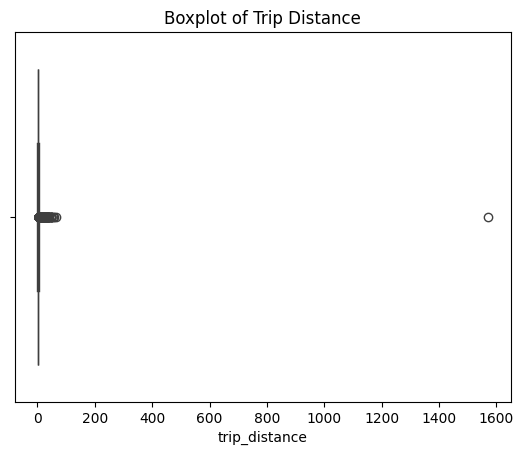

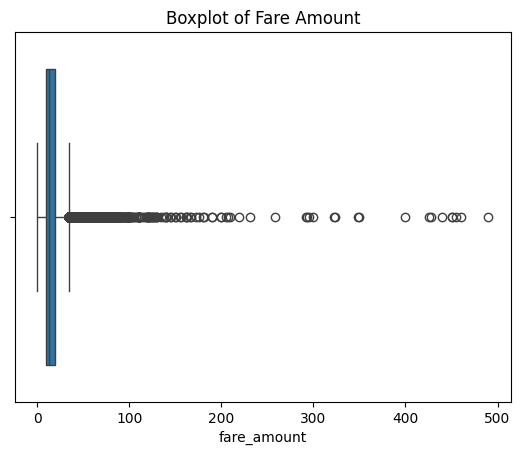

In [50]:
# Boxplot untuk trip_distance
sns.boxplot(x=df['trip_distance'])
plt.title('Boxplot of Trip Distance')
plt.show()

# Boxplot untuk fare_amount
sns.boxplot(x=df['fare_amount'])
plt.title('Boxplot of Fare Amount')
plt.show()

## Filtering Outlier pada `trip_distance`

### Berdasarkan Domain Knowledge:

Common Range for Trip Distance
Short: 0.5 – 3 miles

Medium: 3 – 10 miles

Long: 10 – 30 miles

Nilai-nilai ini mencerminkan distribusi umum dari perjalanan di area seperti Manhattan dan sekitarnya.

Tujuan filtering di sini adalah memusatkan analisis hanya pada data yang representatif dan relevan.

#### 1. Minimum Valid Distance: > 0
- Nilai `0` miles biasanya merupakan **kesalahan pencatatan** atau **perjalanan yang dibatalkan**.
- Maka, hanya nilai `> 0` yang dianggap valid.
- **Sumber:** "Minimum valid distance: > 0 (0 distances are usually errors unless it's a canceled ride)"

#### 2. Batas Atas: <= 30 miles
- Nilai sangat tinggi `> 30` miles dianggap sebagai **outlier atau error input**, seperti `999.9`.
- Kasus ini terjadi biasanya untuk perjalanan keluar kota, data ini umumnya tidak valid untuk analisis umum karna sangat jarang.

#### 3. Tujuan Filtering:
- Membuang data yang tidak valid atau ekstrem.
- Membuat analisis statistik menjadi **lebih akurat**.
- Menghindari **bias** pada model machine learning atau visualisasi data.

---

In [51]:
df = df[
    (df['trip_distance'] > 0) &  # Menghapus 0 miles yang umumnya error/cancel
    (df['trip_distance'] <= 30)  # Menghapus perjalanan yang sangat jauh, biasanya error
]

In [52]:
df['trip_duration_minutes'] = (df['dropoff_datetime'] - df['pickup_datetime']).dt.total_seconds() / 60

df['estimated_max_fare'] = 2.5 + 2.5 * df['trip_distance'] + 0.5 * df['trip_duration_minutes'] + 2

# Filtering: hanya nilai fare_amount yang masuk akal
df = df[
    (df['fare_amount'] >= 2.5) & 
    (df['fare_amount'] <= df['estimated_max_fare'])
]

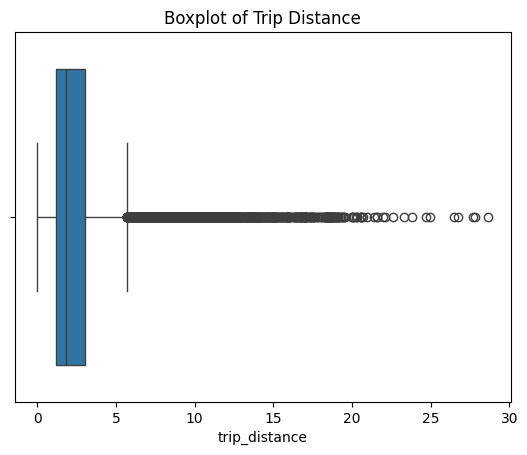

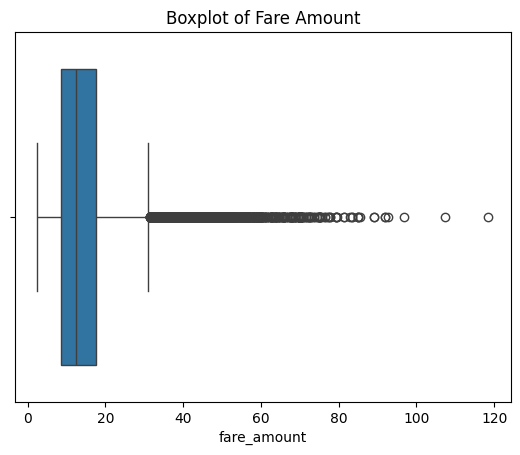

In [53]:
# Boxplot untuk trip_distance
sns.boxplot(x=df['trip_distance'])
plt.title('Boxplot of Trip Distance')
plt.show()

# Boxplot untuk fare_amount
sns.boxplot(x=df['fare_amount'])
plt.title('Boxplot of Fare Amount')
plt.show()

Dalam proses pembersihan dan persiapan data, dilakukan filtering outlier terhadap dua kolom penting, yaitu trip_distance dan fare_amount, guna memastikan bahwa data yang dianalisis benar-benar merepresentasikan kondisi perjalanan nyata dan relevan dengan konteks domain. Filtering ini sangat krusial untuk menghindari distorsi dalam analisis statistik, visualisasi, dan model machine learning.

Pada kolom trip_distance, filtering dilakukan berdasarkan domain knowledge yang menunjukkan bahwa sebagian besar perjalanan di wilayah urban seperti Manhattan memiliki jarak antara 0.5 hingga 30 mil. Oleh karena itu, hanya data dengan nilai trip_distance > 0 dan <= 30 yang dipertahankan. Nilai nol umumnya merupakan kesalahan pencatatan atau perjalanan yang dibatalkan, sementara nilai di atas 30 mil dianggap sebagai outlier ekstrem atau error input (seperti 999.9). Hasilnya, data saat ini sudah sesuai dengan domain knowledge, di mana tidak ada lagi nilai trip_distance yang melebihi 30 mil, sehingga distribusinya menjadi lebih normal, representatif, dan tidak lagi skewed secara ekstrem.

Sementara itu, untuk kolom fare_amount, filtering tidak hanya dilakukan berdasarkan nilai yang tidak valid (misalnya <= 0), tetapi juga disesuaikan dengan perkiraan maksimal tarif menggunakan formula berbasis aturan tarif standar taksi, yaitu:
estimated_max_fare = 2.5 + 2.5 * trip_distance + 0.5 * trip_duration_minutes + 2.

Dengan penerapan formula ini, hanya data dengan fare_amount yang masuk akal terhadap jarak dan durasi perjalanan yang dipertahankan. Meskipun masih terdapat nilai-nilai yang berada di luar batas atas boxplot (soft outliers), tidak ada lagi data dengan fare yang terlalu jauh dari estimasi realistis, sehingga dapat dikatakan tidak terdapat hard outliers. Nilai-nilai tersebut masih dianggap valid karena berada dalam range yang logis dan mungkin terjadi dalam kasus nyata, seperti kemacetan atau penambahan biaya tambahan tertentu.

Secara keseluruhan, filtering ini menghasilkan dataset yang lebih bersih, stabil, dan representatif. Statistik deskriptif seperti mean, median, dan deviasi standar kini lebih mencerminkan pola umum. Model prediktif dan visualisasi pun menjadi lebih akurat dan informatif. Dengan data yang kini sesuai dengan domain knowledge dan telah melalui validasi berbasis aturan logis, proses analisis dapat berjalan dengan lebih percaya diri dan hasilnya pun memiliki validitas yang lebih tinggi.

In [54]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
df.to_csv('clean_dataset.csv', sep=',', index=False)
dfDesc.to_csv('column_list.csv', sep=',', index=False)
dfDesc

(58218, 21)


,dataFeatures,dataType,null,unique,uniqueSample
0,vendor_id,int64,0,2,"[1, 2]"
1,pickup_datetime,datetime64[ns],0,57346,"[2023-01-05T13:22:39.000000000, 2023-01-02T12:51:57.000000000]"
2,dropoff_datetime,datetime64[ns],0,57269,"[2023-01-19T08:59:02.000000000, 2023-01-12T18:37:56.000000000]"
3,store_and_forward_flag,object,0,2,"[Y, N]"
4,rate_code_id,float64,0,5,"[4.0, 3.0]"
5,pickup_location_id,int64,0,176,"[227, 62]"
6,dropoff_location_id,int64,0,243,"[179, 191]"
7,passenger_count,float64,0,8,"[5.0, 3.0]"
8,trip_distance,float64,0,1403,"[8.73, 8.16]"
9,fare_amount,float64,0,247,"[30.75, 73.0]"


Sebelum dibersihkan, kita memiliki 68,211 baris data, sekarang kita memiliki 58,218 baris. Sekitar 4000 baris data yang kosong dihapus, dan 1 kolom yaitu ehail_fee dihapus karena kolom tersebut tidak memiliki nilai sama sekali atau isi datanya 100% null.

# Data Analysis
Kita sudah melakukan tahap _data cleaning_. Sekarang, kita bisa mulai melakukan analisis untuk mencari tahu **Pola Perjalanan**, seperti mengidentifikasi waktu-waktu paling sibuk untuk penjemputan dan pengantaran, mengetahui lokasi asal dan tujuan yang paling sering digunakan, serta menemukan hubungan antara waktu dan lokasi—misalnya, jam-jam sibuk di lokasi tertentu.  

## Ekstraksi Informasi Waktu

In [55]:
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['pickup_day'] = df['pickup_datetime'].dt.day_name()
df['pickup_date'] = df['pickup_datetime'].dt.date

## 10 Lokasi Penjemputan Paling Sering

In [56]:
taxi_zone = pd.read_csv('taxi_zone_lookup.csv')

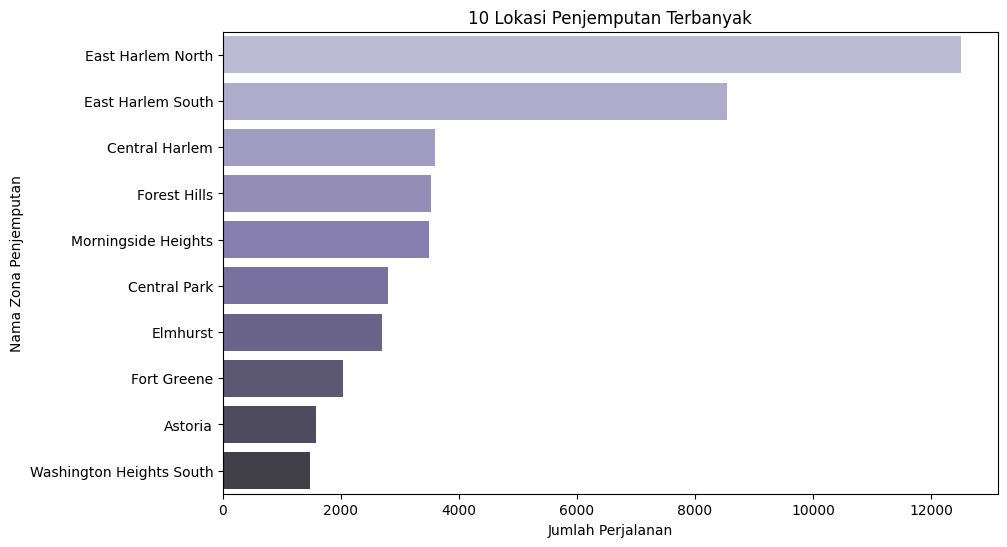

In [57]:
# Merge df dengan taxi_zone_lookup untuk mendapatkan nama zona
df_merged_pickup = df.merge(taxi_zone, how='left', left_on='pickup_location_id', right_on='LocationID')

# Hitung 10 lokasi penjemputan terbanyak berdasarkan nama zona
top_pickup_locations = df_merged_pickup['Zone'].value_counts().head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_pickup_locations.values, y=top_pickup_locations.index, palette="Purples_d")
plt.title('10 Lokasi Penjemputan Terbanyak')
plt.xlabel('Jumlah Perjalanan')
plt.ylabel('Nama Zona Penjemputan')
plt.show()

## 10 Lokasi Tujuan Paling Sering

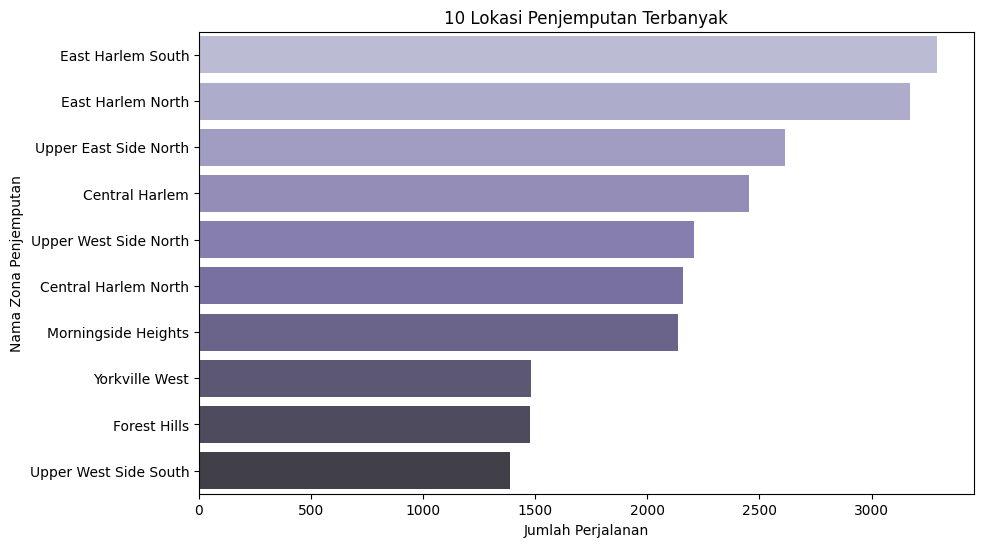

In [58]:
df_merged_dropoff = df.merge(taxi_zone, how='left', left_on='dropoff_location_id', right_on='LocationID')

top_dropoff_locations = df_merged_dropoff['Zone'].value_counts().head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_dropoff_locations.values, y=top_dropoff_locations.index, palette="Purples_d")
plt.title('10 Lokasi Penjemputan Terbanyak')
plt.xlabel('Jumlah Perjalanan')
plt.ylabel('Nama Zona Penjemputan')
plt.show()

## Distribusi Perjalanan per Jam

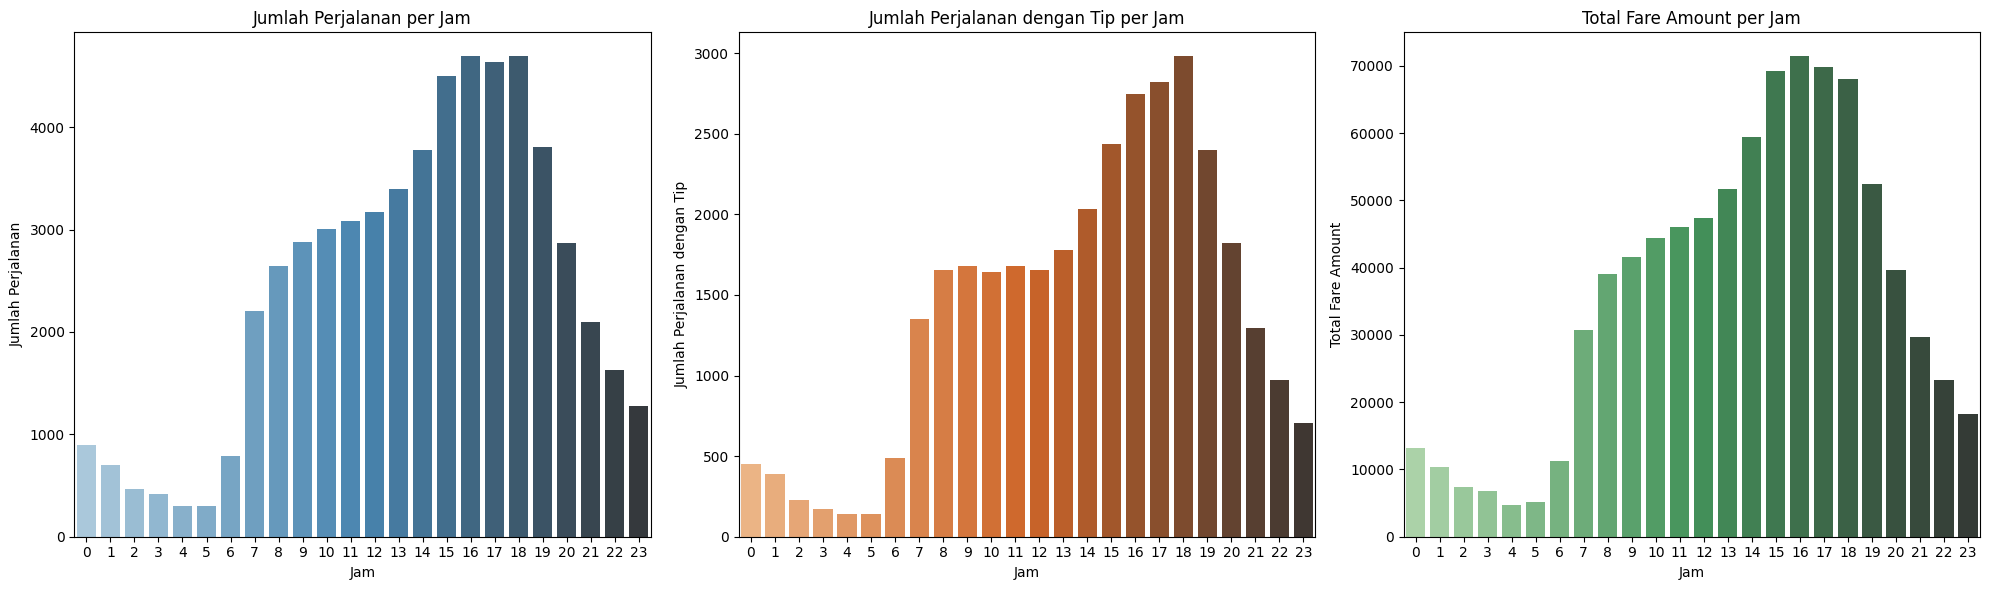

In [59]:
# 1. Semua perjalanan
df_all = df

# 2. Perjalanan yang memberikan tip
df_tip = df[df['tip_amount'] > 0]

# 3. Total fare amount per jam
fare_per_hour = df.groupby('pickup_hour')['fare_amount'].sum().reset_index()

# Setup plot
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharex=True)

# Grafik 1: Jumlah perjalanan per jam
sns.countplot(x='pickup_hour', data=df_all, palette="Blues_d", ax=axes[0])
axes[0].set_title('Jumlah Perjalanan per Jam')
axes[0].set_xlabel('Jam')
axes[0].set_ylabel('Jumlah Perjalanan')

# Grafik 2: Jumlah perjalanan dengan tip
sns.countplot(x='pickup_hour', data=df_tip, palette="Oranges_d", ax=axes[1])
axes[1].set_title('Jumlah Perjalanan dengan Tip per Jam')
axes[1].set_xlabel('Jam')
axes[1].set_ylabel('Jumlah Perjalanan dengan Tip')

# Grafik 3: Total fare_amount per jam
sns.barplot(x='pickup_hour', y='fare_amount', data=fare_per_hour, palette="Greens_d", ax=axes[2])
axes[2].set_title('Total Fare Amount per Jam')
axes[2].set_xlabel('Jam')
axes[2].set_ylabel('Total Fare Amount')

# Tampilkan plot
plt.tight_layout()
plt.show()

## 📊 Grafik 1: Jumlah Perjalanan per Jam

### Insight:
- Aktivitas perjalanan sangat rendah pada dini hari (jam 0–5).
- Jumlah perjalanan mulai meningkat tajam sejak jam 6 pagi, dengan lonjakan signifikan antara jam 7–9.
- Puncak jumlah perjalanan terjadi sekitar jam 16–17 (sore hari).
- Setelah jam 18, jumlah perjalanan mulai menurun kembali.

### Interpretasi:
- Ini menggambarkan pola perjalanan harian: peningkatan saat orang berangkat kerja (pagi) dan saat pulang kerja (sore).
- **Jam sibuk**: 7–9 pagi dan 15–18 sore.

---

## 💰 Grafik 2: Jumlah Perjalanan dengan Tip per Jam

### Insight:
- Pola serupa dengan grafik pertama, tetapi proporsi perjalanan dengan tip jauh lebih rendah dibanding total perjalanan.
- Titik tertinggi pemberian tip juga terjadi pada jam 16–18.
- Relatif sedikit perjalanan dengan tip dilakukan pada dini hari hingga pagi (0–7).

### Interpretasi:
- Pengguna lebih cenderung memberi tip pada jam-jam sibuk, kemungkinan karena pelayanan yang cepat saat permintaan tinggi.
- Mungkin ada korelasi antara kepuasan pengguna dan jam sibuk.

---

## 💵 Grafik 3: Total Fare Amount per Jam

### Insight:
- Jumlah tarif total per jam sangat berkorelasi dengan jumlah perjalanan.
- Puncaknya terjadi pada jam 16–17, sama dengan dua grafik lainnya.
- Bahkan ketika jumlah perjalanan menurun (setelah jam 18), jumlah tarif masih cukup tinggi hingga jam 20.

### Interpretasi:
- Jam-jam dengan total fare tinggi menunjukkan kemungkinan adanya tarif lebih tinggi karena permintaan meningkat (misalnya tarif dinamis).
- Bisa juga berarti perjalanan pada jam tersebut lebih panjang atau lebih mahal secara rata-rata.


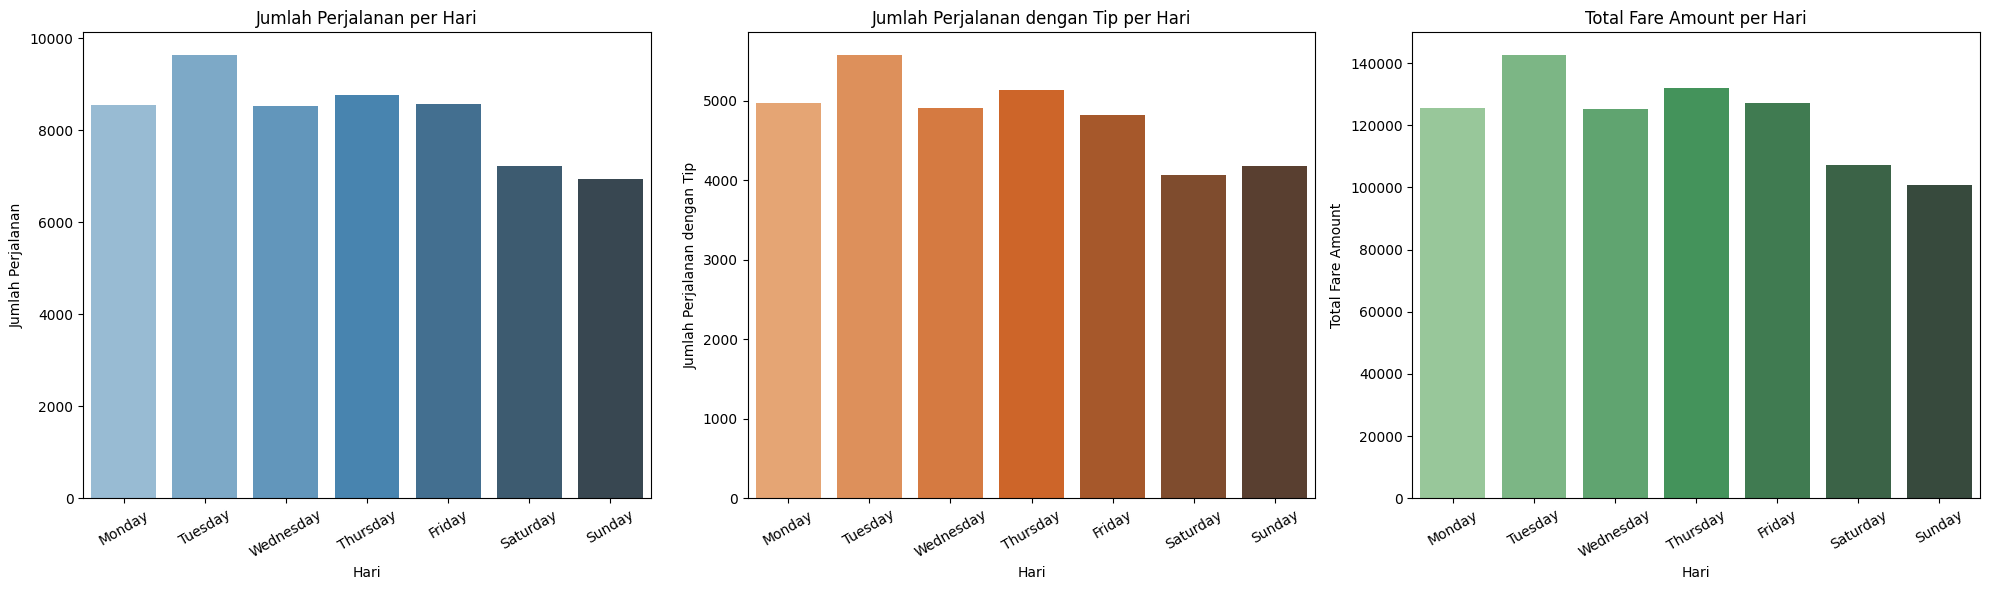

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Urutkan nama hari
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# 1. Semua perjalanan
df_all = df

# 2. Perjalanan dengan tip
df_tip = df[df['tip_amount'] > 0]

# 3. Total fare amount per hari
fare_per_day = df.groupby('pickup_day')['fare_amount'].sum().reindex(day_order).reset_index()

# Setup plot
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharex=False)

# Grafik 1: Jumlah perjalanan per hari
sns.countplot(x='pickup_day', data=df_all, order=day_order, palette="Blues_d", ax=axes[0])
axes[0].set_title('Jumlah Perjalanan per Hari')
axes[0].set_xlabel('Hari')
axes[0].set_ylabel('Jumlah Perjalanan')
axes[0].tick_params(axis='x', rotation=30)

# Grafik 2: Jumlah perjalanan dengan tip
sns.countplot(x='pickup_day', data=df_tip, order=day_order, palette="Oranges_d", ax=axes[1])
axes[1].set_title('Jumlah Perjalanan dengan Tip per Hari')
axes[1].set_xlabel('Hari')
axes[1].set_ylabel('Jumlah Perjalanan dengan Tip')
axes[1].tick_params(axis='x', rotation=30)

# Grafik 3: Total fare amount per hari
sns.barplot(x='pickup_day', y='fare_amount', data=fare_per_day, palette="Greens_d", ax=axes[2])
axes[2].set_title('Total Fare Amount per Hari')
axes[2].set_xlabel('Hari')
axes[2].set_ylabel('Total Fare Amount')
axes[2].tick_params(axis='x', rotation=30)

# Tampilkan semuanya
plt.tight_layout()
plt.show()


## 📊 1. Grafik Kiri: Jumlah Perjalanan per Hari

### Insight:
- Hari **Selasa** memiliki jumlah perjalanan terbanyak (~9700).
- Hari dengan perjalanan terbanyak berikutnya: **Kamis, Jumat, dan Senin** (semuanya >8500).
- Jumlah perjalanan menurun pada akhir pekan, khususnya **Sabtu dan Minggu** (~7000–7200).

### Interpretasi:
- Aktivitas pengguna paling tinggi terjadi di **hari kerja**, khususnya **Selasa** dan **Kamis**.
- **Akhir pekan** cenderung lebih sepi, kemungkinan karena berkurangnya perjalanan rutin (seperti kerja atau sekolah).

---

## 💰 2. Grafik Tengah: Jumlah Perjalanan dengan Tip per Hari

### Insight:
- Jumlah perjalanan dengan tip paling tinggi terjadi pada **Selasa**, diikuti oleh **Kamis** dan **Senin**.
- **Sabtu dan Minggu** kembali menjadi hari dengan jumlah tip paling rendah.
- Proporsi perjalanan dengan tip terlihat relatif **konsisten** terhadap total perjalanan.

### Interpretasi:
- Hari kerja tak hanya lebih sibuk, tapi juga lebih banyak pengguna yang memberikan tip—mungkin karena pelayanan lebih dihargai saat jam sibuk.
- Akhir pekan mungkin diisi oleh pengguna yang lebih **santai** atau **perjalanan non-urgent**, sehingga tip lebih jarang diberikan.

---

## 💵 3. Grafik Kanan: Total Fare Amount per Hari

### Insight:
- **Selasa** mencatat total pendapatan tertinggi (sekitar 145.000).
- Hari-hari kerja lainnya juga tinggi (**Senin, Rabu, Kamis, Jumat**) dengan rentang 125.000–135.000.
- Pendapatan menurun tajam di akhir pekan (**Sabtu & Minggu**), mencapai titik terendah di hari **Minggu** (~100.000).

### Interpretasi:
- Ada **korelasi kuat** antara jumlah perjalanan dan pendapatan harian.
- Namun, **Selasa menonjol** sebagai hari paling produktif dari segala aspek: jumlah perjalanan, jumlah tip, dan total pendapatan.


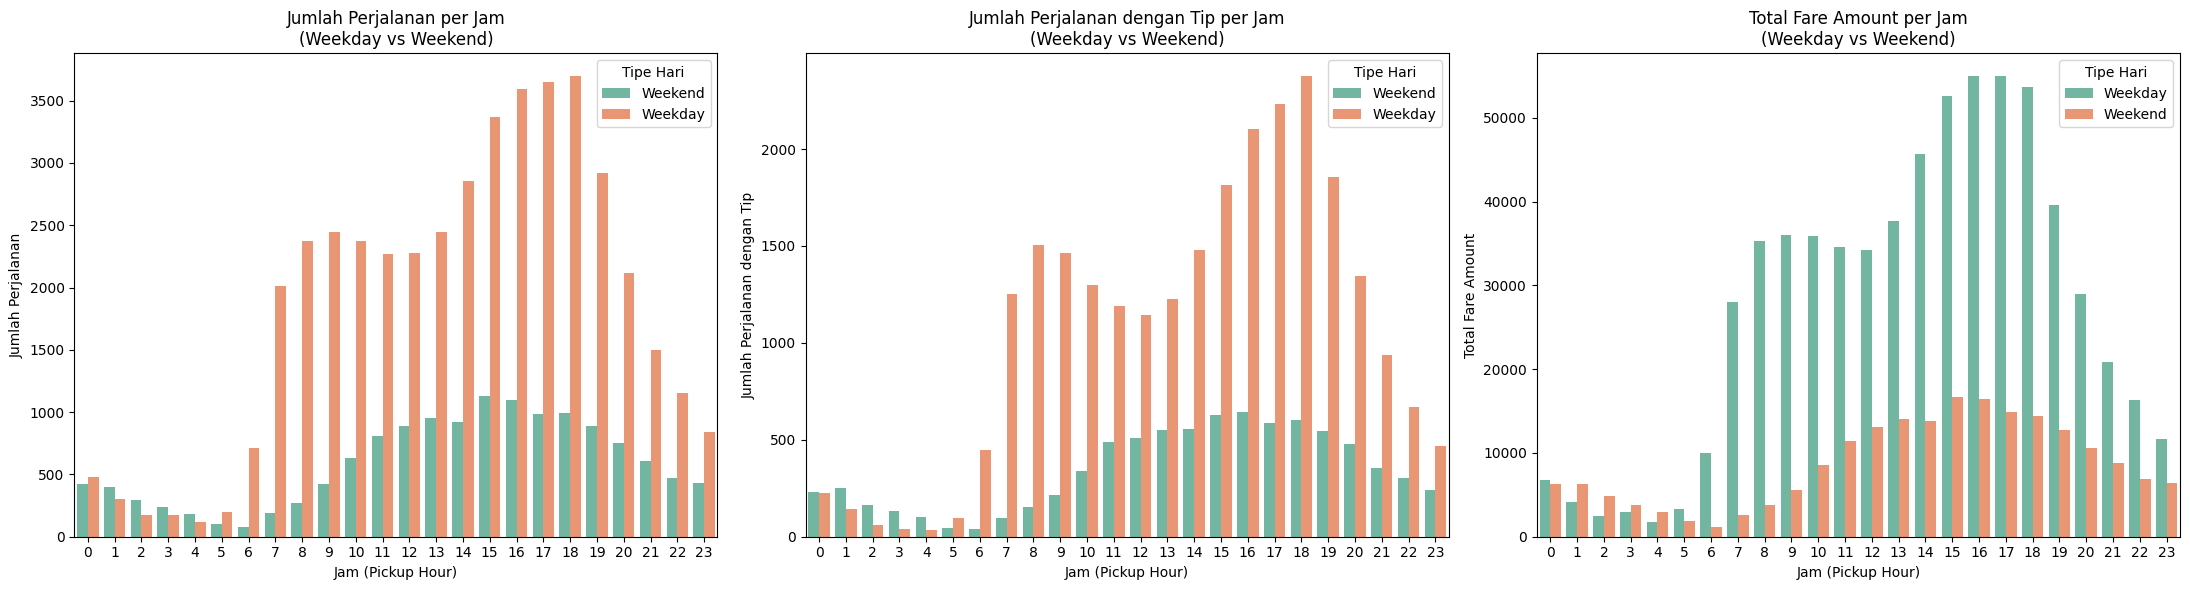

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Buat kolom 'pickup_day_type' jika belum ada
df['pickup_day_type'] = df['pickup_day'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')

# 1. Semua perjalanan
df_all = df

# 2. Perjalanan dengan tip
df_tip = df[df['tip_amount'] > 0]

# 3. Total fare_amount per jam per day type
fare_daytype_hour = df.groupby(['pickup_hour', 'pickup_day_type'])['fare_amount'].sum().reset_index()

# Setup plot
fig, axes = plt.subplots(1, 3, figsize=(22, 6), sharey=False)

# Grafik 1: Jumlah perjalanan per jam (Weekday vs Weekend)
sns.countplot(x='pickup_hour', hue='pickup_day_type', data=df_all, palette='Set2', ax=axes[0])
axes[0].set_title('Jumlah Perjalanan per Jam\n(Weekday vs Weekend)')
axes[0].set_xlabel('Jam (Pickup Hour)')
axes[0].set_ylabel('Jumlah Perjalanan')
axes[0].legend(title='Tipe Hari')

# Grafik 2: Jumlah perjalanan dengan tip per jam (Weekday vs Weekend)
sns.countplot(x='pickup_hour', hue='pickup_day_type', data=df_tip, palette='Set2', ax=axes[1])
axes[1].set_title('Jumlah Perjalanan dengan Tip per Jam\n(Weekday vs Weekend)')
axes[1].set_xlabel('Jam (Pickup Hour)')
axes[1].set_ylabel('Jumlah Perjalanan dengan Tip')
axes[1].legend(title='Tipe Hari')

# Grafik 3: Total fare_amount per jam (Weekday vs Weekend)
sns.barplot(x='pickup_hour', y='fare_amount', hue='pickup_day_type', data=fare_daytype_hour, palette='Set2', ax=axes[2])
axes[2].set_title('Total Fare Amount per Jam\n(Weekday vs Weekend)')
axes[2].set_xlabel('Jam (Pickup Hour)')
axes[2].set_ylabel('Total Fare Amount')
axes[2].legend(title='Tipe Hari')

# Tampilkan plot
plt.tight_layout()
plt.show()


## 📊 Grafik 1: Jumlah Perjalanan per Jam

### 🔍 Insight:
- **Weekday (hari kerja)** mendominasi jumlah perjalanan hampir di semua jam, terutama dari jam **7 pagi hingga 19 malam**.
- **Puncak aktivitas** terjadi sekitar jam **16–18**, dengan >3500 perjalanan per jam.
- **Weekend** menunjukkan pola lebih merata, tanpa lonjakan signifikan, dengan puncak sekitar jam **14–17** (~1100 perjalanan).
- Aktivitas **minimal di jam dini hari (0–5)** untuk kedua kategori.

### 💡 Interpretasi:
- **Jam sibuk (rush hours)** di hari kerja sangat jelas: pagi jam **7–9** dan sore jam **16–18**.
- Weekend cenderung lebih **santai**, dengan distribusi perjalanan yang lebih **flat** dan volume lebih rendah.

---

## 💰 Grafik 2: Jumlah Perjalanan dengan Tip per Jam

### 🔍 Insight:
- **Weekday** kembali mendominasi jumlah perjalanan dengan tip, terutama dari jam **7 pagi hingga 20 malam**.
- **Puncak** terjadi pada jam **17–18** dengan >2200 perjalanan yang diberi tip.
- **Weekend** stabil sekitar **500–600 tip/jam** dari jam 11–18, jauh lebih rendah dibandingkan weekday.

### 💡 Interpretasi:
- **Peluang mendapatkan tip lebih besar** saat jam sibuk di hari kerja.
- Mungkin karena pengguna lebih **terburu-buru**, merasa **puas dengan pelayanan**, atau **terbiasa memberi tip** di situasi profesional.

---

## 💵 Grafik 3: Total Fare Amount per Jam

### 🔍 Insight:
- Berbeda dari dua grafik sebelumnya, **Weekend** justru memiliki **total pendapatan (fare) yang lebih tinggi** dari jam **7–19**.
- **Puncak weekend**: jam **15–17**, dengan total fare mencapai >55.000.
- **Weekday** malah lebih rendah secara konsisten dalam rentang jam tersebut.

### 💡 Interpretasi:
- Perjalanan di **weekend** mungkin **lebih panjang** atau memiliki **tarif lebih tinggi**, walaupun jumlahnya lebih sedikit.
- Bisa jadi karena pengguna melakukan perjalanan **jarak jauh** (jalan-jalan, wisata, keluarga, dll), berbeda dari weekday yang mungkin lebih **pendek dan rutin**.


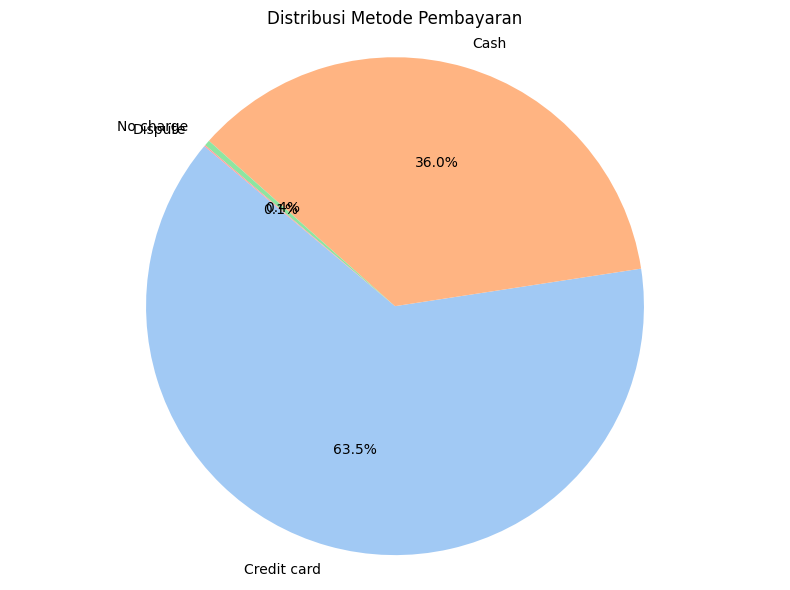

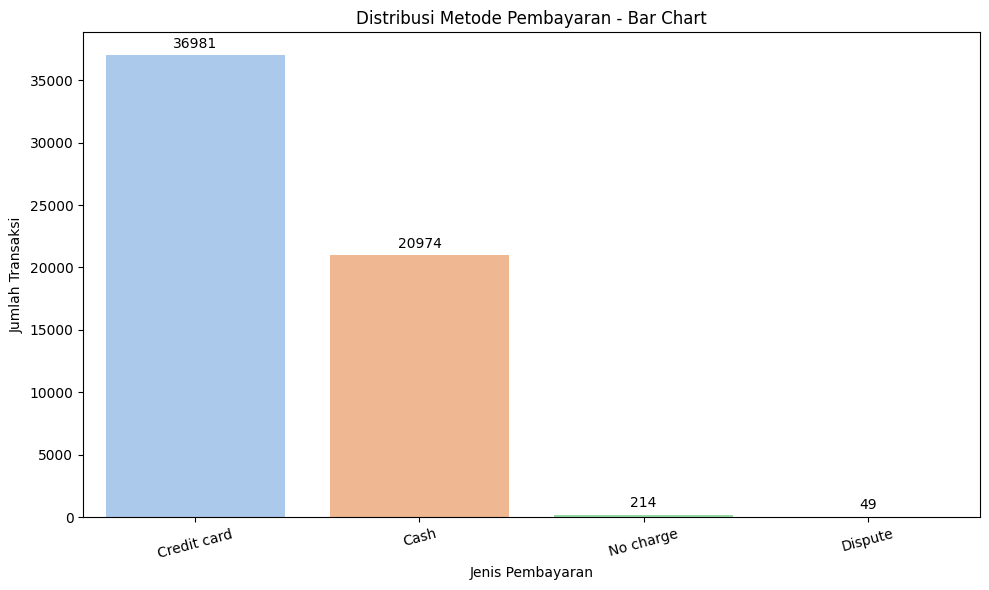

In [62]:
# Mapping nilai payment_type
payment_type_mapping = {
    1: 'Credit card',
    2: 'Cash',
    3: 'No charge',
    4: 'Dispute',
    5: 'Unknown',
    6: 'Voided trip'
}

# Ganti angka dengan label
df['payment_type'] = df['payment_type'].replace(payment_type_mapping)

# Hitung frekuensi
payment_counts = df['payment_type'].value_counts()

# Buat pie chart
plt.figure(figsize=(8, 6))
plt.pie(payment_counts, 
        labels=payment_counts.index, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=sns.color_palette('pastel'))

plt.title("Distribusi Metode Pembayaran")
plt.axis('equal')  # Agar pie chart tetap bulat
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=payment_counts.index, y=payment_counts.values, palette='pastel')

plt.title("Distribusi Metode Pembayaran - Bar Chart")
plt.xlabel("Jenis Pembayaran")
plt.ylabel("Jumlah Transaksi")
plt.xticks(rotation=15)

# Tambahkan nilai di atas setiap bar
for i, v in enumerate(payment_counts.values):
    plt.text(i, v + max(payment_counts.values)*0.01, str(v), 
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

Berdasarkan dua visualisasi yang ditampilkan, yaitu pie chart dan bar chart, dapat disimpulkan bahwa metode pembayaran paling populer selama periode satu bulan adalah kartu kredit dan tunai (cash).

Metode pembayaran menggunakan kartu kredit mendominasi dengan proporsi sebesar 63,5%, yang setara dengan 36.981 perjalanan taksi. Sementara itu, metode tunai masih banyak digunakan dengan persentase sebesar 36%, atau sebanyak 20.974 perjalanan taksi.

Namun, terdapat pula sejumlah transaksi yang tidak tercatat sebagai pembayaran, yang dikategorikan sebagai no charge atau dispute. Kategori no charge merujuk pada kondisi di mana penumpang tidak melakukan pembayaran, seperti dalam kasus penumpang yang melarikan diri tanpa membayar. Sementara itu, transaksi dispute mengindikasikan adanya sengketa atau ketidaksesuaian dalam proses pembayaran.

Temuan ini memberikan insight penting untuk analisis lebih lanjut dengan dukungan data tambahan tentunya, khususnya dalam hal pengelolaan risiko dan strategi penanganan terhadap transaksi yang bermasalah, demi meningkatkan keamanan serta efisiensi dalam sistem pembayaran layanan taksi.

# 🧠 KESIMPULAN UTAMA TERPADU

## ⏰ Jam Sibuk (Peak Hours)

**Weekday:**
- Jam **07.00–09.00** dan **16.00–18.00** adalah waktu paling aktif dan menguntungkan.
- Volume perjalanan dan jumlah tip **tertinggi ada di sore hari** (pukul 17–18).

**Weekend:**
- Tidak menunjukkan puncak setajam weekday, tetapi **fare per trip tinggi terutama jam 14–17**.
- Cocok untuk **perjalanan panjang atau leisure** (wisata, belanja).

---

## 📆 Performa Hari per Hari

| Hari     | Performa    | Insight Kunci                                                  |
|----------|-------------|----------------------------------------------------------------|
| Selasa   | ⭐ Tertinggi | Hari paling sibuk dan profitable (perjalanan & tip)           |
| Kamis    | ⭐ Tinggi    | Kedua terbaik dari segi pendapatan                            |
| Senin    | Baik        | Aktivitas tinggi, tip juga konsisten                          |
| Weekend  | 🚨 Terendah | Volume turun, tapi fare per trip justru naik                  |

---

## 📌 Insight Khusus

**Perjalanan dengan Tip:**
- Lebih sering muncul di **jam sore weekday**.
- Diduga karena **layanan cepat saat lalu lintas padat** → pelanggan memberi tip sebagai bentuk apresiasi.

**Fare Tinggi ≠ Banyak Perjalanan:**
- **Weekend** menunjukkan total fare tinggi walau jumlah trip sedikit.
- Menunjukkan efek **perjalanan jarak jauh**, **tarif dinamis**, atau **durasi perjalanan lebih lama**.

---

## 📊 PERBANDINGAN WEEKDAY vs WEEKEND

| Aspek              | Weekday                            | Weekend                                |
|--------------------|------------------------------------|----------------------------------------|
| Jumlah Perjalanan  | 🟧 Tinggi (07–19)                   | 🟩 Lebih rendah, pola merata            |
| Jumlah Tip         | 🟧 Sangat tinggi sore hari          | 🟩 Stabil dan lebih rendah              |
| Total Fare         | 🟧 Lebih rendah meski volume tinggi | 🟩 Lebih tinggi (jam 14–17)             |
| Karakteristik      | Perjalanan pendek & cepat          | Perjalanan panjang atau leisure         |

---

## 🎯 REKOMENDASI STRATEGIS

### 👨‍✈️ Untuk Pengemudi

**Weekday:**
- Fokus aktif **pukul 07–09 dan 16–18** → jumlah perjalanan & tip tinggi.
- **Prioritaskan hari Selasa dan Kamis** untuk pendapatan optimal.

**Weekend:**
- Fokus **jam 14–17** → meskipun volume rendah, pendapatan per trip tinggi.

---

### 🧩 Untuk Operasional & Bisnis

**Distribusi Armada:**
- Tambahkan armada pada **jam sibuk weekday**.
- Jaga armada cukup di **weekend sore** untuk akomodasi perjalanan bernilai tinggi.

**Promosi & Marketing:**
- **Weekend:** Tawarkan **paket perjalanan jarak jauh** atau **bundling promo** (misalnya: diskon ke tempat wisata).
- **Weekday:** Dorong perjalanan di **jam non-sibuk (10–15)** dengan diskon atau promo ongkos minimum.

---

## 📈 Untuk Analisis Lanjutan

- Telusuri **durasi dan jarak perjalanan** untuk memahami nilai fare tinggi di weekend.
- Hitung dan bandingkan **rata-rata tip per trip per jam/hari** untuk pengambilan keputusan insentif.
